<a href="https://colab.research.google.com/github/mpaydar/CS381/blob/main/M_Bayat_Quiz3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction
  In this dataset, there are 12795 data sets about different wines which were sold. For every wine that was sold. In this data modeling attribute, each wine will have 16 numerical attributes or categorical data. 
  In term of alcohol content, there would be two different types of wine:
  fortified wine and traditional wine. 



  ## Description of attributes
1. **INDEX**: unique number for each wine
2. **TARGET**: Number of wine cases sold
3.  **fixed acidity:** most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

4. **volatile acidity:** the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

5. **Citric acid:** found in small quantities, citric acid can add ‘freshness’ and flavor to wines

6. **Residual sugar:** the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

7. **Chlorides:** the amount of salt in the wine

8. **Free sulfur dioxide: **the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

9. **Total sulfur dioxide:**amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

10. **Density:** the density of water is close to that of water depending on the percent alcohol and sugar content

11. **pH**: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

12.  **Sulphates**: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

13. **Alcohol**: the percent alcohol content of the wine

14. **Market label**: Marketing Score (how attractive is the label)
15. **Stars**: rating of wine(4=Excellent-1-Poor) 

16. **AcidIndex**:total acidity of wine via a weighted average 
 




In [120]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


header=['#OfItemSold']
dataframe=pd.read_csv('https://raw.githubusercontent.com/MatthewFried/Udemy/master/Day2/Day2_Data.csv')
print(dataframe.head())

datadframeCopy1=dataframe
datacopy2=datadframeCopy1

#Checking on the dimension of data
numbersOfRecords,numberOfattribute=dataframe.shape
print("number of wine sold(Number of rows)=",numbersOfRecords)
print("number of wine attirbutes=",numberOfattribute)






   INDEX  TARGET  FixedAcidity  VolatileAcidity  CitricAcid  ResidualSugar  \
0      1       3           3.2            1.160       -0.98           54.2   
1      2       3           4.5            0.160       -0.81           26.1   
2      4       5           7.1            2.640       -0.88           14.8   
3      5       3           5.7            0.385        0.04           18.8   
4      6       4           8.0            0.330       -1.26            9.4   

   Chlorides  FreeSulfurDioxide  TotalSulfurDioxide  Density    pH  Sulphates  \
0     -0.567                NaN               268.0  0.99280  3.33      -0.59   
1     -0.425               15.0              -327.0  1.02792  3.38       0.70   
2      0.037              214.0               142.0  0.99518  3.12       0.48   
3     -0.425               22.0               115.0  0.99640  2.24       1.83   
4        NaN             -167.0               108.0  0.99457  3.12       1.77   

   Alcohol  LabelAppeal  AcidIndex  STARS  


##Analysis of Various Features##
##Categorical Data:
    By understanding the dataset and proper domain knowlege we can see that 
    there are possibly 2 categorical data in the dataset, namely label appeal 
    and Stars/rating.   
    label appeal scale:
    -2 to 2 (poor to best) 
    -------------------------------------
    Stars scale: 1-4
    1-2 : poor quality
    3-4: good quality 






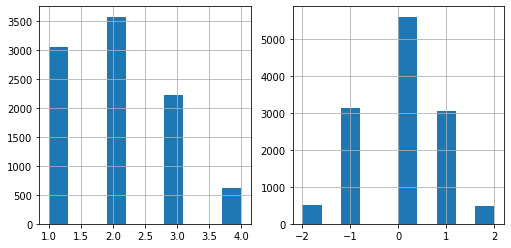

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

cat1=dataframe['STARS']
cat2=dataframe['LabelAppeal']




ax =plt.subplot(1,2,1)
cat1.hist()



plt.subplot(1,2,2)
cat2.hist()



plt.subplots_adjust(right=1.2)
plt.show()






###Checking For N/A Values
Looking at the histogram of Rating , we can see that there are a lot of rating for the wines that have been sold , so we could investigate the data and see if we can find anything explaining this poor rating for the wines which were sold. 


The histogram for the label appealing is pretty much symmetrical and there is not much that could be said based on the current label rating. 

Let's investigate whether there are N/A values in our categorical attirbutes.


In [122]:
numberOfNa=dataframe.isnull().sum()
print(numberOfNa)




INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64


As you can see the number of N/A values for one of our categorical attributes is 3359. We are missing so many rating which could be explain why the rating data is so skewed to the poor side . 

Now we will be checking for 0's in attributes that doesn't make sense to have 0's

In [123]:
## Chechking for 0's  Number wines sold: 
a=dataframe.loc[(dataframe['TARGET']==0)]
print("The number of zeros:",len(a))

The number of zeros: 2734


## Reforming the dataframe
By inspecting the data and carefully considerring the information on the dataframe we have from the dataset,we could start editing some of the header name with more meaningful names. For example Target which is the column for the number of wine sold could be renamed to "NumberOFWineSold" and "STARS" could be renamed as "Rating". The other improvement we could do the dataframe is dropping the "Index" column since it is not providing us any additional informaton about wine that matter to us in this report. Then we look at the static of our dataset. 

In [124]:
dataframe=dataframe.drop(['INDEX'],axis=1)
dataframe=dataframe.rename(columns={'TARGET':'NumberOFWineSold','STARS':'Rating'})
dataframe.describe()


,NumberOFWineSold,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,Rating
count,12795.000000,12795.000000,12795.000000,12795.000000,12179.000000,12157.000000,12148.000000,12113.000000,12795.000000,12400.000000,11585.000000,12142.000000,12795.000000,12795.000000,9436.000000
mean,3.029074,7.075717,0.324104,0.308413,5.418733,0.054822,30.845571,120.714233,0.994203,3.207628,0.527112,10.489236,-0.009066,7.772724,2.041755
std,1.926368,6.317643,0.784014,0.862080,33.749379,0.318467,148.714558,231.913211,0.026538,0.679687,0.932129,3.727819,0.891089,1.323926,0.902540
min,0.000000,-18.100000,-2.790000,-3.240000,-127.800000,-1.171000,-555.000000,-823.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,2.000000,5.200000,0.130000,0.030000,-2.000000,-0.031000,0.000000,27.000000,0.987720,2.960000,0.280000,9.000000,-1.000000,7.000000,1.000000
50%,3.000000,6.900000,0.280000,0.310000,3.900000,0.046000,30.000000,123.000000,0.994490,3.200000,0.500000,10.400000,0.000000,8.000000,2.000000
75%,4.000000,9.500000,0.640000,0.580000,15.900000,0.153000,70.000000,208.000000,1.000515,3.470000,0.860000,12.400000,1.000000,8.000000,3.000000
max,8.000000,34.400000,3.680000,3.860000,141.150000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,26.500000,2.000000,17.000000,4.000000


## Now let's make histogram for other attributes and get more insight from the dataset:

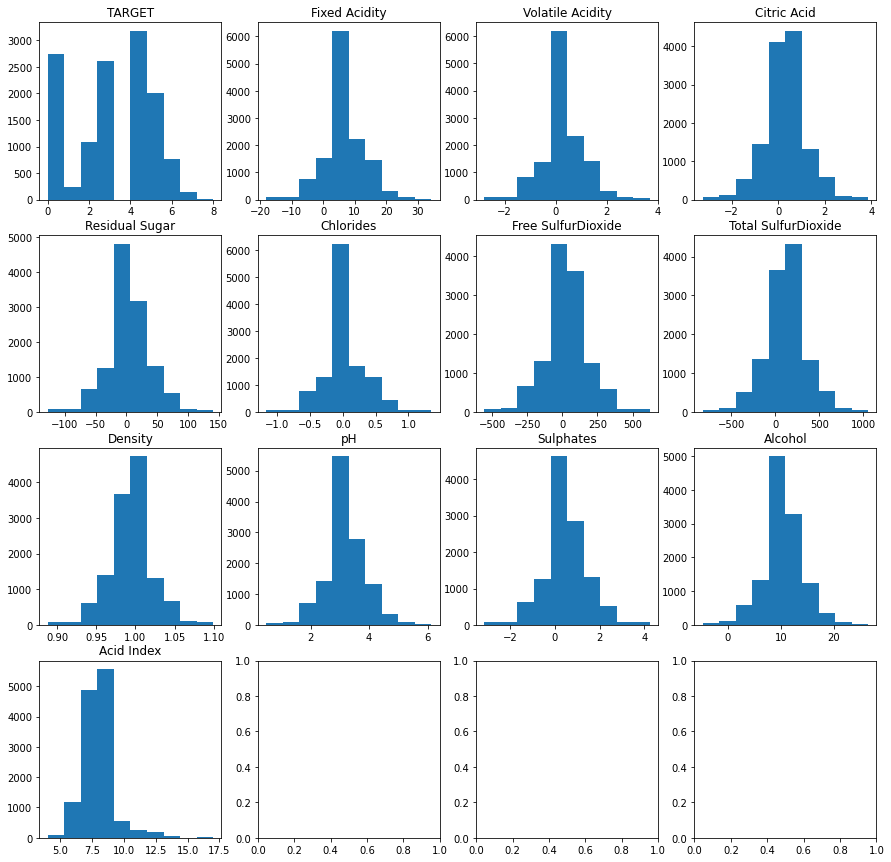

In [125]:






att1=dataframe['NumberOFWineSold']
att2=dataframe['FixedAcidity']
att3=dataframe['VolatileAcidity']
att4=dataframe['CitricAcid']
att5=dataframe['ResidualSugar']
att6=dataframe['Chlorides']
att7=dataframe['FreeSulfurDioxide']
att8=dataframe['TotalSulfurDioxide']
att9=dataframe['Density']
att10=dataframe['pH']
att11=dataframe['Sulphates']
att12=dataframe['Alcohol']
att13=dataframe['AcidIndex']

fig,a =  plt.subplots(4,4)

a[0][0].hist(att1)
a[0][0].set_title('TARGET')

a[0][1].hist(att2)
a[0][1].set_title('Fixed Acidity')

a[0][2].hist(att3)
a[0][2].set_title('Volatile Acidity')

a[0][3].hist(att4)
a[0][3].set_title('Citric Acid')


a[1][0].hist(att5)
a[1][0].set_title('Residual Sugar')

a[1][1].hist(att6)
a[1][1].set_title('Chlorides')


a[1][2].hist(att7)
a[1][2].set_title('Free SulfurDioxide')


a[1][3].hist(att8)
a[1][3].set_title('Total SulfurDioxide')


a[2][0].hist(att9)
a[2][0].set_title('Density')

a[2][1].hist(att10)
a[2][1].set_title('pH')

a[2][2].hist(att11)
a[2][2].set_title('Sulphates')


a[2][3].hist(att12)
a[2][3].set_title('Alcohol')



a[3][0].hist(att13)
a[3][0].set_title('Acid Index')



plt.gcf().set_size_inches(15, 15)



plt.show()







Here you could see that we have negative range values for some of the attributes which really doesn't make sense. For example, it does make sense for 
FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides	Free SulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol to be negative. 
Let's get some visual insight and see some box plots between our categorical and numerical attributes. By visualizing the data as boxplot we can also learn more about outlier and if they can explain something for us. 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


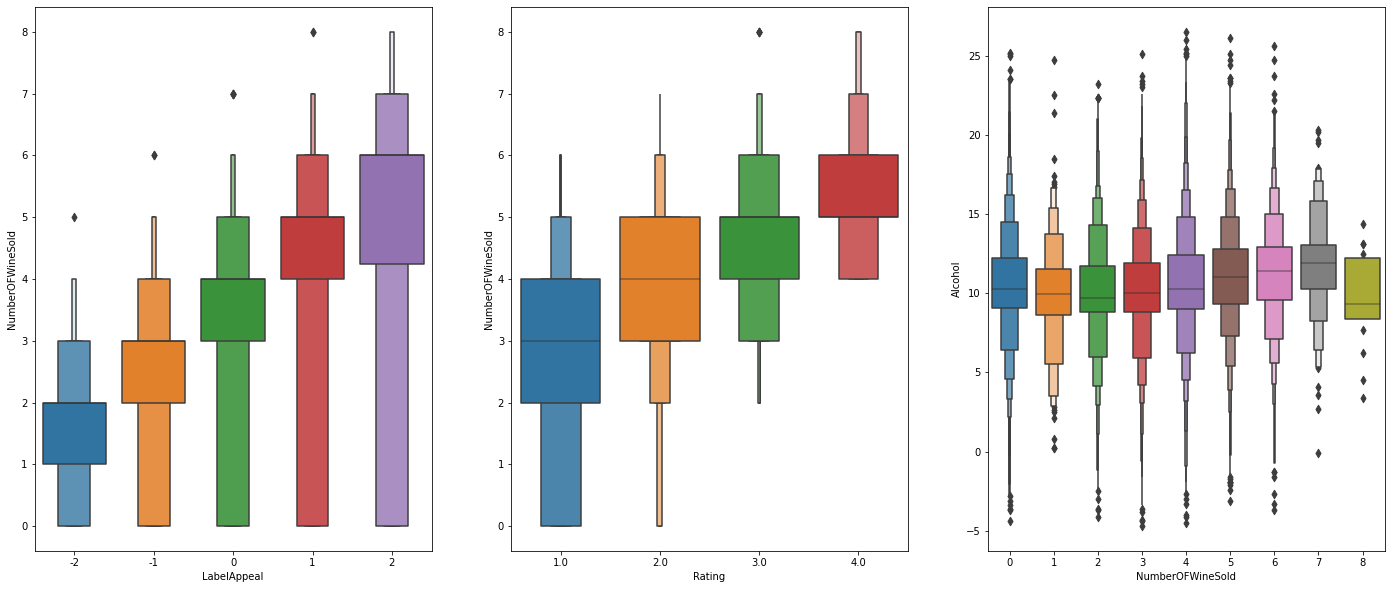

In [126]:
fig,a =  plt.subplots(1,2)

plt.subplot(1,3,1)
sns.boxenplot(dataframe['LabelAppeal'],dataframe['NumberOFWineSold'])

plt.subplot(1,3,2)
sns.boxenplot(dataframe['Rating'],dataframe['NumberOFWineSold'])

plt.subplot(1,3,3)
sns.boxenplot(dataframe['NumberOFWineSold'],dataframe['Alcohol'])







plt.subplots_adjust(right=2)
plt.gcf().set_size_inches(10, 10)





We could see from the left box-plot that for wines with appealing labels, we would see more sell. 
Also we could see from the right box-plot that on average those wines with high rating have higher number of sell, which makes sense. 

In the United States, one "standard" drink (or one alcoholic drink equivalent) contains roughly 14 grams of pure alcohol, which is found in:
5 ounces of wine, which is typically about 12% alcohol and you could see that in about all cases that wine was bought, on average it contained 12%. 
From this graph , we could see some outlier as high as 25% which doens't make sense. 
Let’s take a look at alcohol levels are in wine from the lightest to the strongest. Truth be told, alcohol content in wine ranges wildly from as low as 5.5% to 23% ABV. So clearly there outlier needs be filtered. On the other side, we have some outlier on negative side. The lightest alcohol could contain 5, so anything from should be rule out. It can be seen that there were more sell in that contain on average 12% of alcohol. 




https://www.niaaa.nih.gov/alcohols-effects-health/overview-alcohol-consumption/what-standard-drink#:~:text=In%20the%20United%20States%2C%20one,is%20typically%20about%2012%25%20alcohol



A good wine is all about the moderate or balance content of alcohol, sugar, and acid. let's look at the correlation of the attirbutes and have some more insight. However, when there are more alcohol in wine it means there are more sugar.
Higher sugar accumulation in grapes = higher alcohol.
let's visualize this:

Certain wines have more sugar than others. This is achieved in several different ways. Most commonly, winemakers simply stop the fermentation process before the yeast has converted all of the sugars into alcohol, resulting in a wine that is higher in residual sugar. Sugar is important in production of alcohol. 


Cheaper, mass-produced wines are known to be higher in residual sugars. These cheaper wineries often utilize tricks such as adding artificial acids to help balance overly sweet wines, or adding in artificial sugars to add balance to overly sour grapes.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


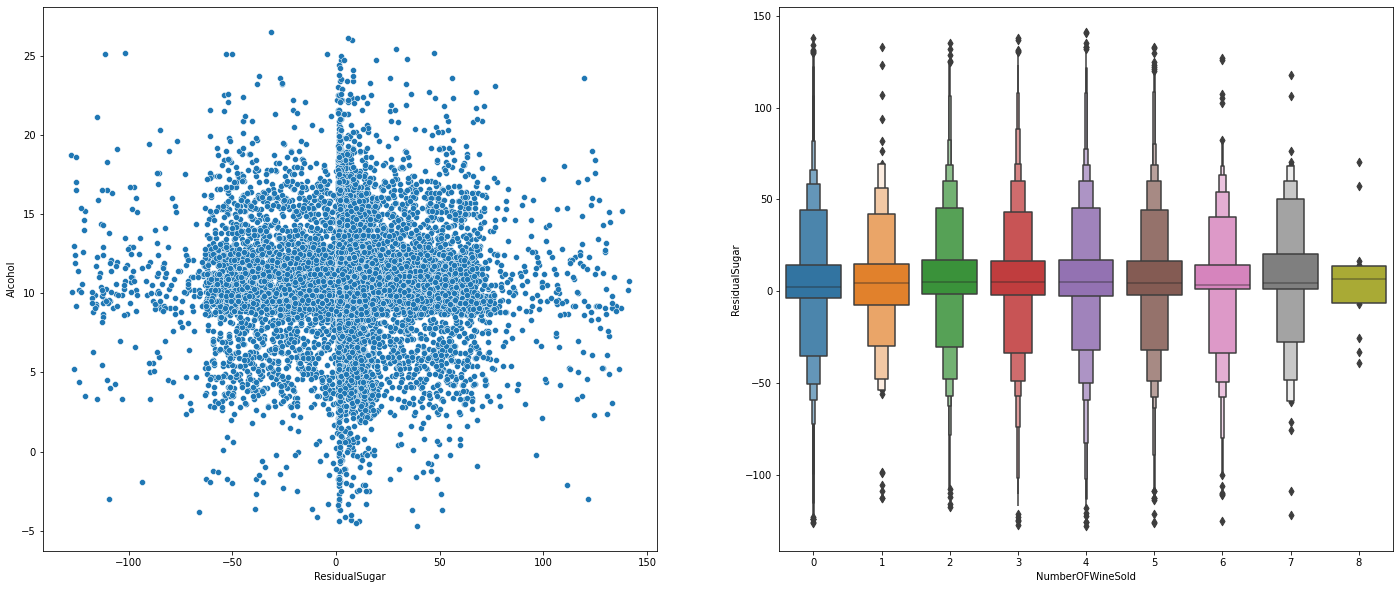

In [127]:


plt.subplot(1,2,1)
sns.scatterplot(dataframe['ResidualSugar'],dataframe['Alcohol'])

plt.subplot(1,2,2)
sns.boxenplot(x=dataframe['NumberOFWineSold'],y=dataframe['ResidualSugar'])

plt.subplots_adjust(right=2)
plt.gcf().set_size_inches(10, 10)

plt.show()

You can see that the wins with highest sell had very little sugar because they are considerred as expensive wines. Again we see some extreme cases that really don't makes sense. The amount of sugar in a bottle of wine can vary from as little as 4 grams to as much as 58 grams. We see values in 100's or -100's. 
A reliable range should from 4 to 58 . 

In [128]:
corr = dataframe.corr()
corr.style.background_gradient(cmap='coolwarm')

,NumberOFWineSold,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,Rating
NumberOFWineSold,1.000000,-0.049011,-0.088793,0.008685,0.016491,-0.038263,0.043824,0.051478,-0.035518,-0.009445,-0.038850,0.062062,0.356500,-0.246049,0.558794
FixedAcidity,-0.049011,1.000000,0.012375,0.014240,-0.018855,-0.000457,0.004972,-0.022498,0.006477,-0.008983,0.030783,-0.009371,-0.003366,0.178437,-0.006628
VolatileAcidity,-0.088793,0.012375,1.000000,-0.016953,-0.006483,0.000987,-0.007077,-0.021080,0.014735,0.013592,0.000129,0.004073,-0.016987,0.044642,-0.034431
CitricAcid,0.008685,0.014240,-0.016953,1.000000,-0.006940,-0.008567,0.006428,0.006320,-0.013952,-0.008709,-0.012989,0.017046,0.008650,0.065697,0.000665
ResidualSugar,0.016491,-0.018855,-0.006483,-0.006940,1.000000,-0.005594,0.017493,0.022479,0.004101,0.012118,-0.007723,-0.019998,0.002320,-0.009414,0.016741
Chlorides,-0.038263,-0.000457,0.000987,-0.008567,-0.005594,1.000000,-0.020661,-0.013994,0.022657,-0.017605,-0.003290,-0.019695,0.010509,0.025238,-0.004931
FreeSulfurDioxide,0.043824,0.004972,-0.007077,0.006428,0.017493,-0.020661,1.000000,0.013720,0.003176,0.006049,0.011593,-0.018588,0.010294,-0.041717,-0.009082
TotalSulfurDioxide,0.051478,-0.022498,-0.021080,0.006320,0.022479,-0.013994,0.013720,1.000000,0.012816,-0.004343,-0.007133,-0.015957,-0.009747,-0.049311,0.013929
Density,-0.035518,0.006477,0.014735,-0.013952,0.004101,0.022657,0.003176,0.012816,1.000000,0.005768,-0.009059,-0.007215,-0.009370,0.040413,-0.018284
pH,-0.009445,-0.008983,0.013592,-0.008709,0.012118,-0.017605,0.006049,-0.004343,0.005768,1.000000,0.005475,-0.011548,0.004138,-0.058676,-0.000488


From this correlation mapping , we could see very small correlation between citric acid. There is very small amount of citric acid however as long as it is small percentage of the wine , it would add quality to the wine. According to UC Davis, citric acid is often added to wines to increase acidity, complement a specific flavor or prevent ferric hazes. It can be added to finished wines to increase acidity and give a “fresh” flavor, however it should be small perctage of the wine. 
Only small amounts of citric acid are present in grapes. Only about 5 percent of the total acid is citric in sound grapes.That's why positive correlation between number of wine sold and citric acid. 


https://wineserver.ucdavis.edu/industry-info/enology/methods-and-techniques/common-chemical-reagents/citric-acid#:~:text=Citric%20acid%20is%20often%20added,acid%20is%20its%20microbial%20instability.


https://www.homebrewit.com/pages/a-detailed-explanation-of-acids-used-in-wine-making

#Data Prepration:
## Negative Values:
There are negative values that have to be taken care of because it doesn't make sense to have negative values in our data. 

False


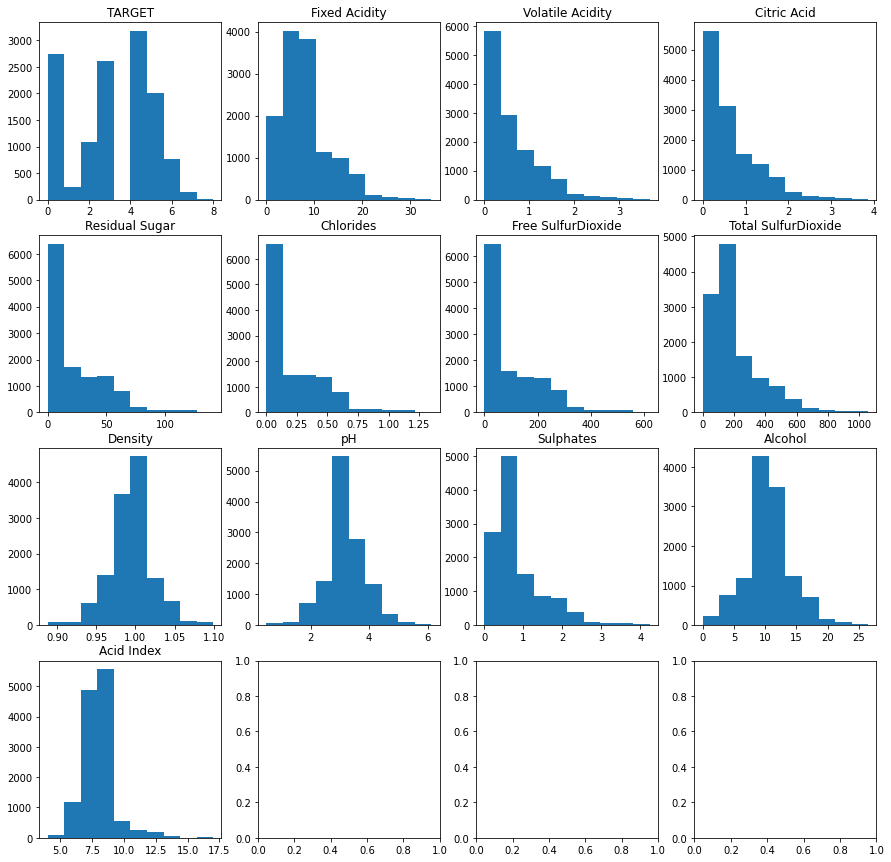

In [129]:
dataframeCopy=dataframe.copy().abs()    # making everything positive
# print(dataframe.head())


# checking for negative numbers:
print((dataframeCopy < 0).values.any())
# if result==False:
#   print('There no negative values in the dataframe')








att1=dataframeCopy['NumberOFWineSold']
att2=dataframeCopy['FixedAcidity']
att3=dataframeCopy['VolatileAcidity']
att4=dataframeCopy['CitricAcid']
att5=dataframeCopy['ResidualSugar']
att6=dataframeCopy['Chlorides']
att7=dataframeCopy['FreeSulfurDioxide']
att8=dataframeCopy['TotalSulfurDioxide']
att9=dataframeCopy['Density']
att10=dataframeCopy['pH']
att11=dataframeCopy['Sulphates']
att12=dataframeCopy['Alcohol']
att13=dataframeCopy['AcidIndex']

fig,a =  plt.subplots(4,4)

a[0][0].hist(att1)
a[0][0].set_title('TARGET')

a[0][1].hist(att2)
a[0][1].set_title('Fixed Acidity')

a[0][2].hist(att3)
a[0][2].set_title('Volatile Acidity')

a[0][3].hist(att4)
a[0][3].set_title('Citric Acid')


a[1][0].hist(att5)
a[1][0].set_title('Residual Sugar')

a[1][1].hist(att6)
a[1][1].set_title('Chlorides')


a[1][2].hist(att7)
a[1][2].set_title('Free SulfurDioxide')


a[1][3].hist(att8)
a[1][3].set_title('Total SulfurDioxide')


a[2][0].hist(att9)
a[2][0].set_title('Density')

a[2][1].hist(att10)
a[2][1].set_title('pH')

a[2][2].hist(att11)
a[2][2].set_title('Sulphates')


a[2][3].hist(att12)
a[2][3].set_title('Alcohol')



a[3][0].hist(att13)
a[3][0].set_title('Acid Index')



plt.gcf().set_size_inches(15, 15)



plt.show()










The shape of the distribution is almost the same and didn't change much so we could possible move on for further data cleaning. 


## Missing Values:
We saw that in our earlier analysis that there are so many missing values in the Rating Column , we can fill in those values with the median,mean,or bfill/ffill wherever it is appropriated. 

In [130]:
df_statFill=dataframe.copy()

# print(df_statFill)
# dataframe['Rating'] = df_statFill['Rating'].fillna(df_statFill['Rating'].median)
dataframe['Rating'].fillna(method='bfill',inplace=True)
print(df_statFill['Rating'].head())


dataframe['ResidualSugar'].fillna(method='bfill',inplace=True)
print(df_statFill['ResidualSugar'].head())


dataframe['Sulphates'].fillna(method='ffill',inplace=True)
print(df_statFill['Sulphates'].head())


dataframe['TotalSulfurDioxide'].fillna(method='bfill',inplace=True)
print(df_statFill['TotalSulfurDioxide'].head())


dataframe['TotalSulfurDioxide'].fillna(method='bfill',inplace=True)
print(df_statFill['TotalSulfurDioxide'].head())

dataframe['pH'].fillna(dataframe['pH'].mean(),inplace=True)
print(df_statFill['pH'].head())


dataframe['Chlorides'].fillna(dataframe['Chlorides'].median(),inplace=True)
print(df_statFill['Chlorides'].head())


dataframe['FreeSulfurDioxide'].fillna(dataframe['FreeSulfurDioxide'].mean(),inplace=True)
print(df_statFill['FreeSulfurDioxide'].head())



dataframe['Alcohol'].fillna(dataframe['Alcohol'].mean(),inplace=True)
print(df_statFill['Alcohol'].head())






0    2.0
1    3.0
2    3.0
3    1.0
4    2.0
Name: Rating, dtype: float64
0    54.2
1    26.1
2    14.8
3    18.8
4     9.4
Name: ResidualSugar, dtype: float64
0   -0.59
1    0.70
2    0.48
3    1.83
4    1.77
Name: Sulphates, dtype: float64
0    268.0
1   -327.0
2    142.0
3    115.0
4    108.0
Name: TotalSulfurDioxide, dtype: float64
0    268.0
1   -327.0
2    142.0
3    115.0
4    108.0
Name: TotalSulfurDioxide, dtype: float64
0    3.33
1    3.38
2    3.12
3    2.24
4    3.12
Name: pH, dtype: float64
0   -0.567
1   -0.425
2    0.037
3   -0.425
4      NaN
Name: Chlorides, dtype: float64
0      NaN
1     15.0
2    214.0
3     22.0
4   -167.0
Name: FreeSulfurDioxide, dtype: float64
0     9.9
1     NaN
2    22.0
3     6.2
4    13.7
Name: Alcohol, dtype: float64


###Checking to see N/A in each column:


NumberOFWineSold      0
FixedAcidity          0
VolatileAcidity       0
CitricAcid            0
ResidualSugar         0
Chlorides             0
FreeSulfurDioxide     0
TotalSulfurDioxide    0
Density               0
pH                    0
Sulphates             0
Alcohol               0
LabelAppeal           0
AcidIndex             0
Rating                0
dtype: int64


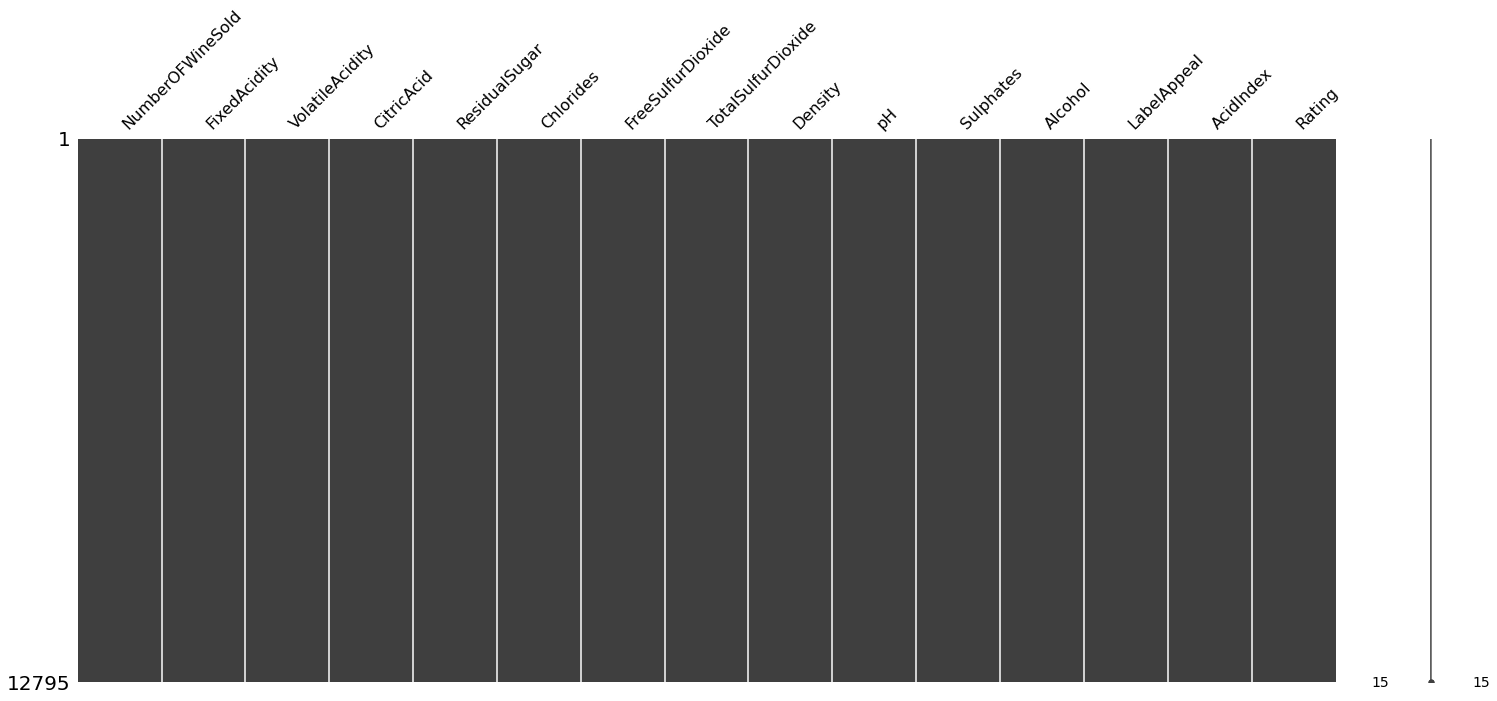

In [131]:
import missingno as msno
print(dataframe.isnull().sum())
ax=msno.matrix(dataframe)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


array([54.2 , 26.1 , 14.8 , ...,  0.65,  4.95, 84.9 ])

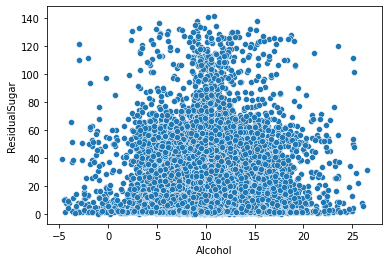

In [132]:
dataframe['ResidualSugar']=abs(dataframe['ResidualSugar'])
sns.scatterplot(dataframe['Alcohol'],dataframe['ResidualSugar'],data=dataframe)
pd.unique(dataframe['ResidualSugar'])

This looks amazing now that we have cleaned the data , we have more

## Using Background Knowledge to filter out unreasonable values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


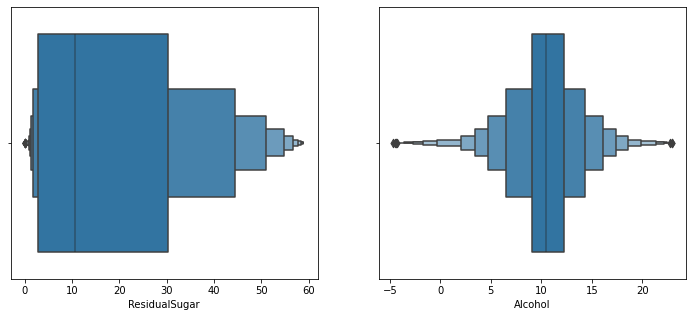

In [133]:
dataframe_copy2=dataframe.copy()
dataframe_copy2=dataframe[(5<dataframe.Alcohol )]



dataframe=dataframe.loc[dataframe['ResidualSugar']<59]
plt.subplot(1,2,1)
sns.boxenplot(dataframe['ResidualSugar'],y=None)
# plt.hist(dataframe_copy2['Alcohol'],bins=20)








# 5.5% to 23 alcohol
plt.subplot(1,2,2)
# dataframe=dataframe.loc[(5<dataframe['Alcohol']).astype(int) & (dataframe['Alcohol']<23).astype(int)]
dataframe=dataframe.loc[(dataframe['Alcohol']<23)]
sns.boxenplot(dataframe['Alcohol'],y=None)








plt.subplots_adjust(right=2)
plt.gcf().set_size_inches(5, 5)
plt.show()




As it it evidence the Residual Sugar is definietly within the logical range , after filling out the N/A values the mean didn't change which is a good sign.

In [134]:
dataframe.describe()

,NumberOFWineSold,FixedAcidity,VolatileAcidity,CitricAcid,ResidualSugar,Chlorides,FreeSulfurDioxide,TotalSulfurDioxide,Density,pH,Sulphates,Alcohol,LabelAppeal,AcidIndex,Rating
count,11546.000000,11546.000000,11546.000000,11546.000000,11546.000000,11546.000000,11546.000000,11546.000000,11546.000000,11546.000000,11546.000000,11546.000000,11546.000000,11546.000000,11546.000000
mean,3.025896,7.072077,0.322252,0.312860,17.703716,0.054205,30.815525,121.307639,0.994307,3.206658,0.526084,10.454002,-0.009960,7.777152,2.043392
std,1.929041,6.291943,0.785808,0.863504,17.207956,0.311338,145.775760,231.037904,0.026600,0.671698,0.932765,3.549021,0.894226,1.329077,0.903545
min,0.000000,-18.100000,-2.790000,-3.240000,0.000000,-1.171000,-555.000000,-816.000000,0.888090,0.480000,-3.130000,-4.700000,-2.000000,4.000000,1.000000
25%,2.000000,5.200000,0.120000,0.030000,2.900000,-0.007000,5.000000,28.000000,0.988190,2.970000,0.270000,9.100000,-1.000000,7.000000,1.000000
50%,3.000000,6.900000,0.280000,0.310000,10.700000,0.046000,30.845571,123.500000,0.994500,3.207628,0.500000,10.489236,0.000000,8.000000,2.000000
75%,4.000000,9.400000,0.640000,0.590000,30.200000,0.129000,64.000000,208.000000,1.000800,3.450000,0.860000,12.200000,1.000000,8.000000,3.000000
max,8.000000,34.400000,3.680000,3.860000,58.900000,1.351000,623.000000,1057.000000,1.099240,6.130000,4.240000,22.900000,2.000000,17.000000,4.000000


In [135]:
from sklearn.preprocessing import MinMaxScaler

df_copy=dataframe

scaler=MinMaxScaler(feature_range=(0,1))
standardized_features1=scaler.fit_transform(df_copy['ResidualSugar'].values.reshape(-1,1))
df_copy['ResidualSugar']=standardized_features1

standardized_features2=scaler.fit_transform(df_copy['Alcohol'].values.reshape(-1,1))
df_copy['Alcohol']=standardized_features2


print(df_copy['ResidualSugar'].describe())




count    11546.000000
mean         0.300572
std          0.292155
min          0.000000
25%          0.049236
50%          0.181664
75%          0.512733
max          1.000000
Name: ResidualSugar, dtype: float64


# Conclusion: 
As you can see after data cleanup and data transformation of ResidualSugar and alcohol are done successfully. After successfully cleaning up the data , it is ready for any transformation . 